# THE SPARKS FOUNDATION

## Task 1- Prediction using Supervised ML 
### Predicting the percentage of marks a student is expected to score based upon the number of hours they studied.

### Name: Bhavya Shah

### Step 1: Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Step 2: Visualization: Plotting the distribution of scores

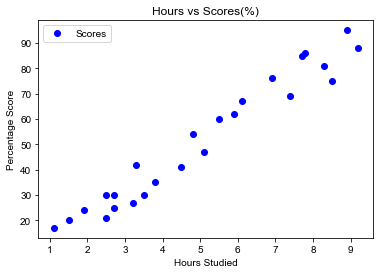

In [4]:
df.plot(x='Hours', y='Scores', style='o', color='blue') 
style.use('seaborn')
plt.title('Hours vs Scores(%)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Step 3: Preparing data and splitting dataset

In [5]:
X = df.iloc[:, :-1].values
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [6]:
y = df.iloc[:, 1].values
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Step 4: Splitting the data into for training and testing

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20, 1), (20,), (5, 1), (5,))

### Step 5: Training the Algotithm 

In [8]:
from sklearn.linear_model import LinearRegression  

lr = LinearRegression()  
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
lr.coef_

array([9.91065648])

In [10]:
lr.intercept_

2.018160041434683

### Step 6: Visualizing the model by plotting the predicted line

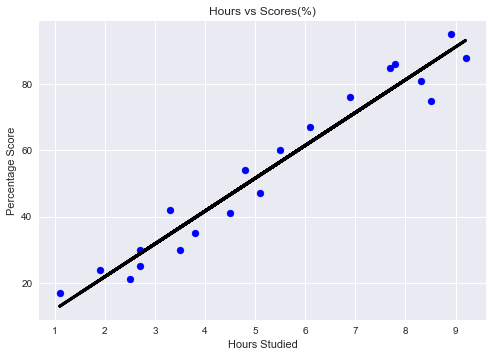

In [11]:
# Plotting the regression line, Equation of the line is y = m*x + c
line = lr.coef_*X+lr.intercept_

style.use('seaborn')
plt.scatter(X_train, y_train, color='blue')
plt.plot(X, line, color='black',linewidth = 3)
plt.title('Hours vs Scores(%)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

### Step 7: Making Predictions

In [12]:
print(X_test) #testing data in hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})  
print(comp.head(5))

                 Actual                                          Predicted
0  [20, 27, 69, 30, 62]  [16.884144762398037, 33.73226077948984, 75.357...


### Step 8: Evaluating the model

In [14]:
from sklearn import metrics  

In [15]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


### Predicted score if a student studies for 9.25 hrs/ day

In [16]:
hours = 9.25
score_prediction = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(score_prediction[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
